In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

Load handwritten digits dataset from UCI, as a pandas dataframe. 

In [2]:
data = load_digits(as_frame=True)
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Visualize some of the images in the dataset.

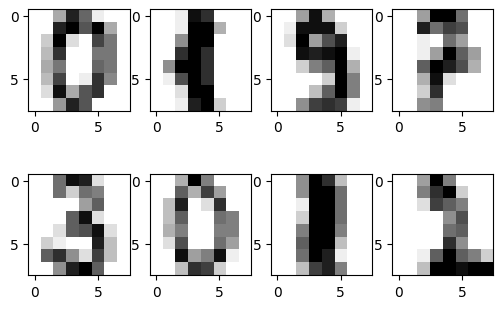

In [3]:
fig, ax = plt.subplots(2,4)
ax[0,0].imshow(data.images[0], cmap='gray_r')
ax[0,1].imshow(data.images[99], cmap='gray_r')
ax[0,2].imshow(data.images[199], cmap='gray_r')
ax[0,3].imshow(data.images[299], cmap='gray_r')
ax[1,0].imshow(data.images[999], cmap='gray_r')
ax[1,1].imshow(data.images[1099], cmap='gray_r')
ax[1,2].imshow(data.images[1199], cmap='gray_r')
ax[1,3].imshow(data.images[1299], cmap='gray_r')

Pipeline for testing and training k-nn models.

In [9]:
def train_knn(n, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    return accuracy

def cross_validate_knn(k):
    test_accuracies = []
    train_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data.data):
        train_features, test_features = data.data.loc[train_index], data.data.loc[test_index]
        train_labels, test_labels = data.target.loc[train_index], data.target.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        train_accuracy = test(model, train_features, train_labels)
        test_accuracies.append(accuracy)
        train_accuracies.append(train_accuracy)
    return np.mean(test_accuracies), np.mean(train_accuracies)

cross_validate_knn(1)
    

(0.9888728037614452, 1.0)

Plot k values versus accuracies

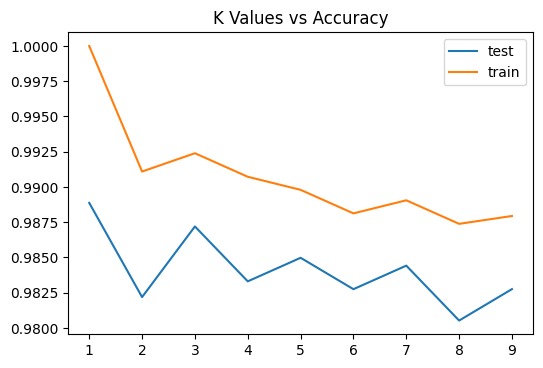

In [14]:
k_values = list(range(1,10))
test_accuracies = []
train_accuracies = []

for k in k_values:
    test_accuracy, train_accuracy = cross_validate_knn(k)
    test_accuracies.append(test_accuracy)
    train_accuracies.append(train_accuracy)
    
plt.plot(k_values, test_accuracies, label='test')
plt.plot(k_values, train_accuracies, label='train')
plt.title('K Values vs Accuracy')
plt.legend()
plt.show()

Pipeline for testing and training neural networks

In [16]:
def train_mlp(neurons, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neurons)
    mlp.fit(train_features, train_labels)
    return mlp

# test function stays the same

def cross_validate_mlp(neurons):
    test_accuracies = []
    train_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data.data):
        train_features, test_features = data.data.loc[train_index], data.data.loc[test_index]
        train_labels, test_labels = data.target.loc[train_index], data.target.loc[test_index]
        model = train_mlp(neurons, train_features, train_labels)
        test_accuracy = test(model, test_features, test_labels)
        test_accuracies.append(test_accuracy)
        train_accuracy = test(model, train_features, train_labels)
        train_accuracies.append(train_accuracy)
    return np.mean(test_accuracies), np.mean(train_accuracies)


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

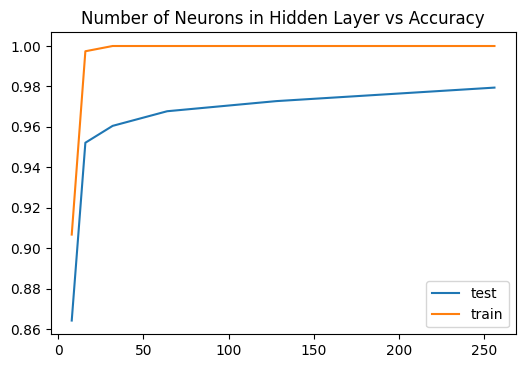

In [17]:
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
test_accuracies = []
train_accuracies = []

for n in nn_one_neurons:
    test_accuracy, train_accuracy = cross_validate_mlp(n)
    test_accuracies.append(test_accuracy)
    train_accuracies.append(train_accuracy)
    
x = [i[0] for i in nn_one_neurons]
plt.plot(x, test_accuracies, label='test')
plt.plot(x, train_accuracies, label='train')
plt.title('Number of Neurons in Hidden Layer vs Accuracy')
plt.legend()
plt.show()

Both the neural network and k nearest neighbors peak around 98% accuracy. The neural network does not provide an advantage. Plus, after 32 neurons the neural network overfits the data.

Add 2 hidden layers.

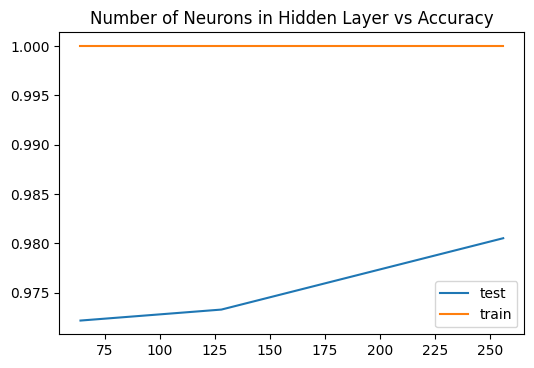

In [19]:
nn_two_neurons = [
    (64,64),
    (128,128),
    (256,256)
]
test_accuracies = []
train_accuracies = []

for n in nn_two_neurons:
    test_accuracy, train_accuracy = cross_validate_mlp(n)
    test_accuracies.append(test_accuracy)
    train_accuracies.append(train_accuracy)
    
x = [i[0] for i in nn_two_neurons]
plt.plot(x, test_accuracies, label='test')
plt.plot(x, train_accuracies, label='train')
plt.title('Number of Neurons in Hidden Layer vs Accuracy')
plt.legend()
plt.show()

Neural networks with two hidden layers are more overfit, but the overfitting is reduced as we add neurons to each layer.

Modify the pipeline to use 6 fold cross validation instead of 4 fold. Then, train neural networks with 3 hidden layers.

In [21]:
# train_mlp and test functions stay the same

def cross_validate_mlp_6(neurons):
    test_accuracies = []
    train_accuracies = []
    kf = KFold(n_splits = 6, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data.data):
        train_features, test_features = data.data.loc[train_index], data.data.loc[test_index]
        train_labels, test_labels = data.target.loc[train_index], data.target.loc[test_index]
        model = train_mlp(neurons, train_features, train_labels)
        test_accuracy = test(model, test_features, test_labels)
        test_accuracies.append(test_accuracy)
        train_accuracy = test(model, train_features, train_labels)
        train_accuracies.append(train_accuracy)
    return np.mean(test_accuracies), np.mean(train_accuracies)


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

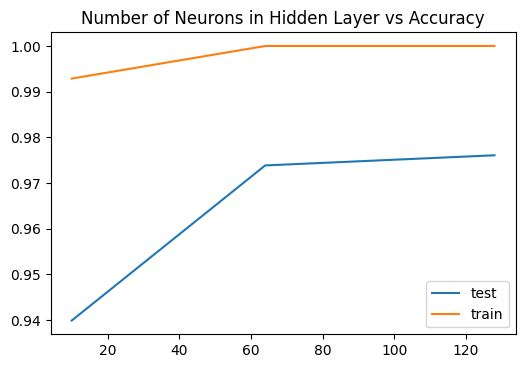

In [23]:
nn_three_neurons = [
    (10,10,10),
    (64,64,64),
    (128,128,128)
]
test_accuracies = []
train_accuracies = []

for n in nn_three_neurons:
    test_accuracy, train_accuracy = cross_validate_mlp_6(n)
    test_accuracies.append(test_accuracy)
    train_accuracies.append(train_accuracy)
    
x = [i[0] for i in nn_three_neurons]
plt.plot(x, test_accuracies, label='test')
plt.plot(x, train_accuracies, label='train')
plt.title('Number of Neurons in Hidden Layer vs Accuracy')
plt.legend()
plt.show()

The optimization of the neural network with 3 hidden layers maxes out at 64 neurons per hidden layer.